# Ejercicio 10
##Cuantificación y distorsión

###Objetivo
Implementar un cuantificador uniforme de Nbits configurable.
Comparar la señal original y la cuantificada, tanto en el dominio del tiempo como en el espectro.


Implementar un cuantificador uniforme de Nbits configurable en Python. Generar una onda seno de 440 Hz, amplitud 1.0 y duración 2 segundos a 44.1 kHz. Implementar una función `cuantificar` que reciba la señal y el número de bits, y devuelva la señal cuantificada. Probar con Nbits = 8, 4 y 2. Para cada caso, graficar la señal original vs. cuantificada (con zoom), el error de cuantificación, y calcular la SNR aproximada comparándola con la fórmula teórica. Adicionalmente, analizar y graficar el espectro de la señal original, cuantificada y el error de cuantificación para cada Nbits.

## Generar la señal sinusoidal

### Subtask:
Crear una onda sinusoidal con los parámetros especificados.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define signal parameters
frequency = 440  # Hz
amplitude = 1.0
duration = 2  # seconds
sampling_rate = 44100  # Hz

# Generate time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sinusoidal signal
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Plot the generated signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Original Sine Wave (440 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Implementar la función de cuantificación

### Subtask:
Crear una función que cuantifique la señal de entrada dado un número de bits.


In [ ]:
def cuantificar(signal, nbits):
    """Quantizes the input signal using a uniform quantizer.

    Args:
        signal: The input signal as a NumPy array.
        nbits: The number of bits for quantization.

    Returns:
        The quantized signal as a NumPy array.
    """
    num_levels = 2**nbits
    signal_range = np.max(signal) - np.min(signal)
    step_size = signal_range / num_levels

    # Shift and scale the signal to fit within [0, num_levels - 1]
    shifted_scaled_signal = (signal - np.min(signal)) / step_size

    # Apply rounding to get integer quantization indices
    quantized_indices = np.round(shifted_scaled_signal)

    # Scale and shift the quantized indices back to the original amplitude range
    quantized_signal = quantized_indices * step_size + np.min(signal)

    return quantized_signal

## Cuantificar la señal

### Subtask:
Aplicar la función de cuantificación a la señal sinusoidal para diferentes valores de Nbits.


In [ ]:
# Define a list of nbits values to test
nbits_values = [8, 4, 2]

# Initialize an empty dictionary to store the quantized signals
quantized_signals = {}

# Iterate through the list of nbits values and apply quantization
for nbits in nbits_values:
    quantized_signals[nbits] = cuantificar(signal, nbits)

# Display the keys of the dictionary to show the nbits values for which quantization was performed
print("Quantization performed for nbits values:", list(quantized_signals.keys()))

Quantization performed for nbits values: [8, 4, 2]


## Graficar las señales en el dominio del tiempo

### Subtask:
Mostrar la señal original, la señal cuantificada y el error de cuantificación para cada Nbits. Incluir un zoom para visualizar detalles.


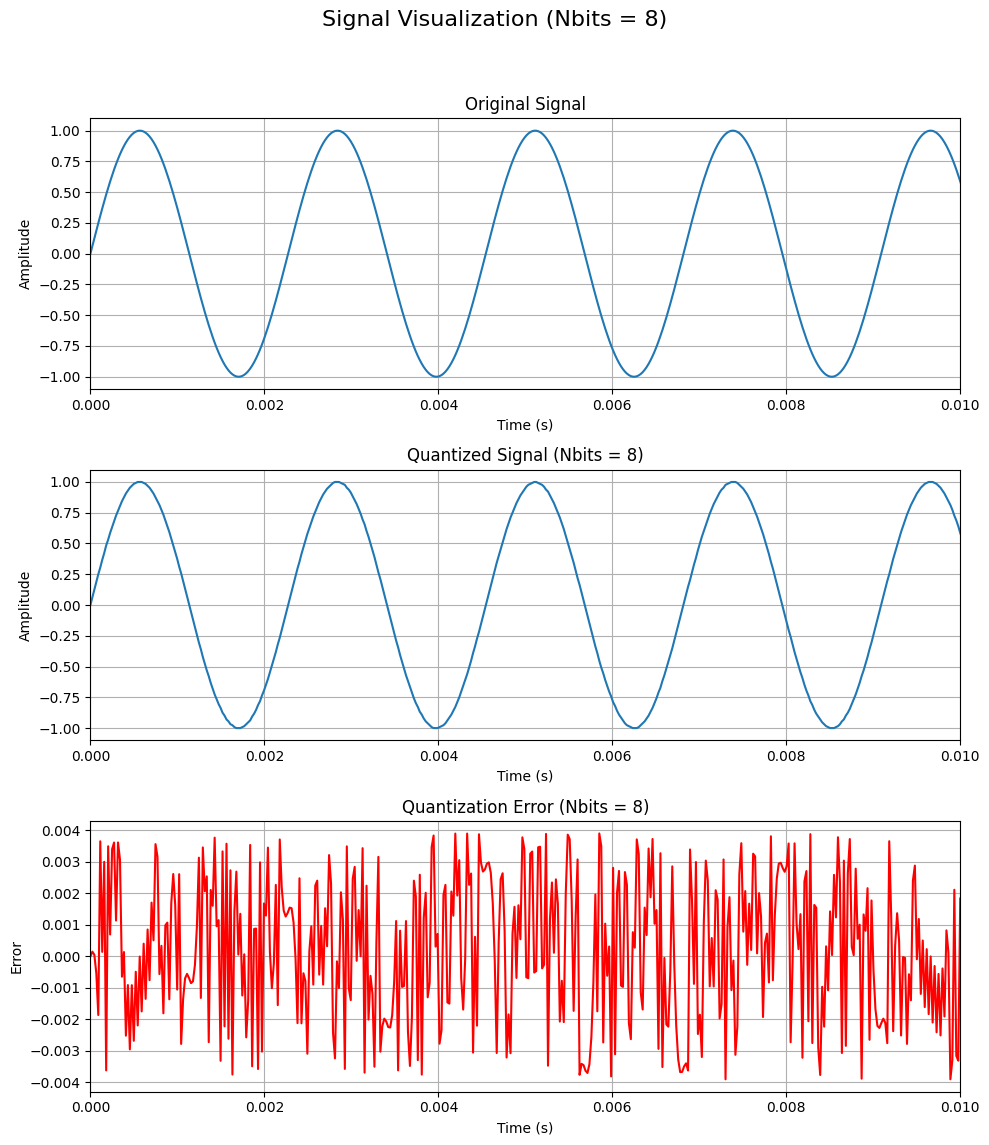

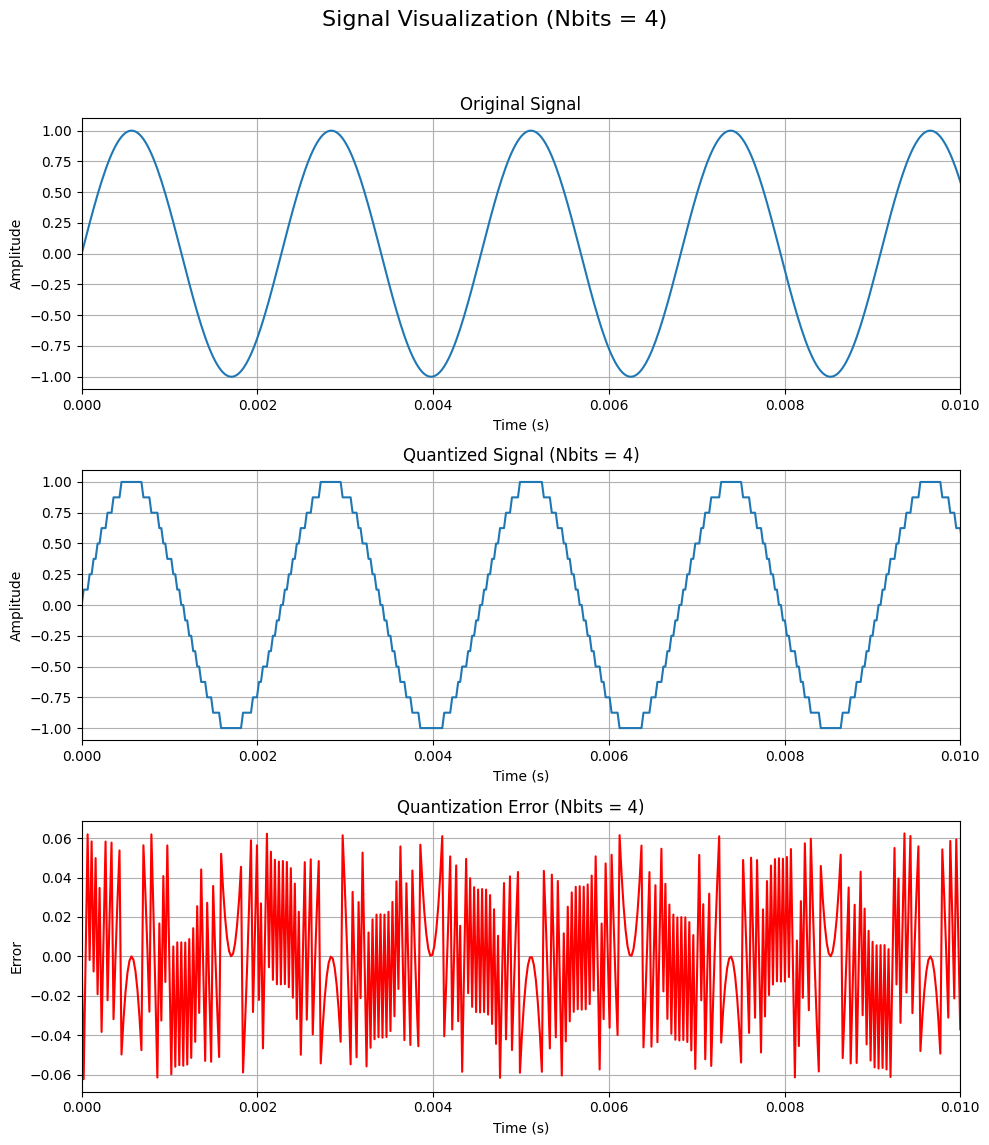

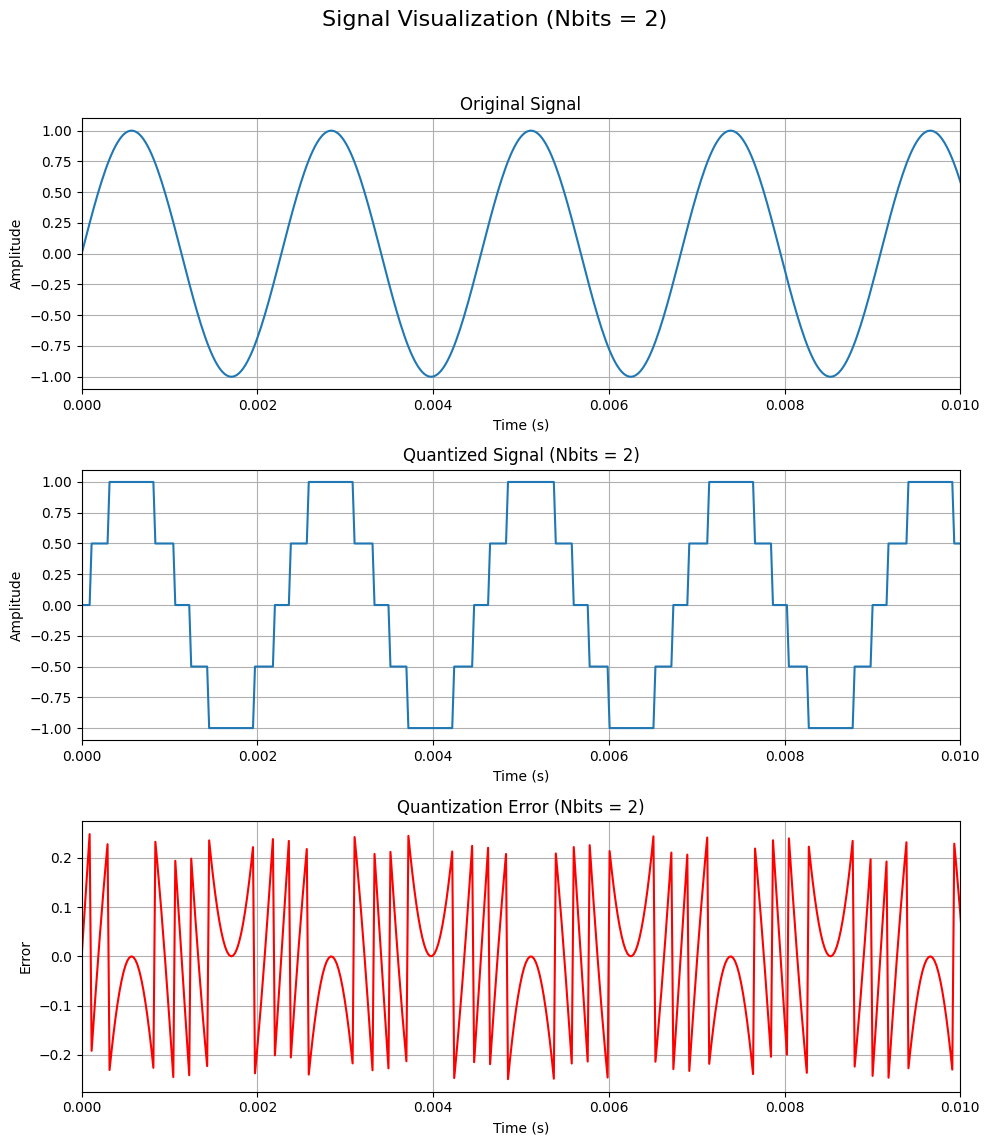

In [ ]:
for nbits in nbits_values:
    quantized_signal = quantized_signals[nbits]
    quantization_error = signal - quantized_signal

    fig, axes = plt.subplots(3, 1, figsize=(10, 12))
    fig.suptitle(f'Signal Visualization (Nbits = {nbits})', fontsize=16)

    # Plot Original Signal
    axes[0].plot(t, signal)
    axes[0].set_title('Original Signal')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Amplitude')
    axes[0].set_xlim(0, 0.01) # Apply zoom
    axes[0].grid(True)

    # Plot Quantized Signal
    axes[1].plot(t, quantized_signal)
    axes[1].set_title(f'Quantized Signal (Nbits = {nbits})')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Amplitude')
    axes[1].set_xlim(0, 0.01) # Apply zoom
    axes[1].grid(True)

    # Plot Quantization Error
    axes[2].plot(t, quantization_error, color='red')
    axes[2].set_title(f'Quantization Error (Nbits = {nbits})')
    axes[2].set_xlabel('Time (s)')
    axes[2].set_ylabel('Error')
    axes[2].set_xlim(0, 0.01) # Apply zoom
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

## Calcular y mostrar la snr

### Subtask:
Calcular la SNR aproximada para cada Nbits y compararla con la fórmula teórica.


In [ ]:
# 1. Calculate the signal power of the original signal.
signal_power = np.mean(signal**2)

# 2. For each quantized signal in quantized_signals, calculate the power of the quantization error.
error_powers = {}
for nbits, quantized_signal in quantized_signals.items():
    quantization_error = signal - quantized_signal
    error_powers[nbits] = np.mean(quantization_error**2)

# 3. Calculate the Signal-to-Noise Ratio (SNR) in decibels (dB) for each nbits.
approximate_snrs = {}
for nbits, error_power in error_powers.items():
    # Add a small epsilon to avoid division by zero if error_power is zero
    approximate_snrs[nbits] = 10 * np.log10(signal_power / (error_power + 1e-10))

# 4. Calculate the theoretical SNR in dB for each nbits.
theoretical_snrs = {}
for nbits in quantized_signals.keys():
    theoretical_snrs[nbits] = 6.02 * nbits + 1.76

# 5. Print the calculated approximate SNR and theoretical SNR for each nbits.
for nbits in quantized_signals.keys():
    print(f"Nbits = {nbits}:")
    print(f"  Approximate SNR: {approximate_snrs[nbits]:.2f} dB")
    print(f"  Theoretical SNR: {theoretical_snrs[nbits]:.2f} dB")
    print("-" * 20)

Nbits = 8:
  Approximate SNR: 50.02 dB
  Theoretical SNR: 49.92 dB
--------------------
Nbits = 4:
  Approximate SNR: 26.22 dB
  Theoretical SNR: 25.84 dB
--------------------
Nbits = 2:
  Approximate SNR: 14.59 dB
  Theoretical SNR: 13.80 dB
--------------------


## Analizar el espectro de las señales

### Subtask:
Calcular y visualizar el espectro de la señal original, la señal cuantificada y el error de cuantificación para cada Nbits.


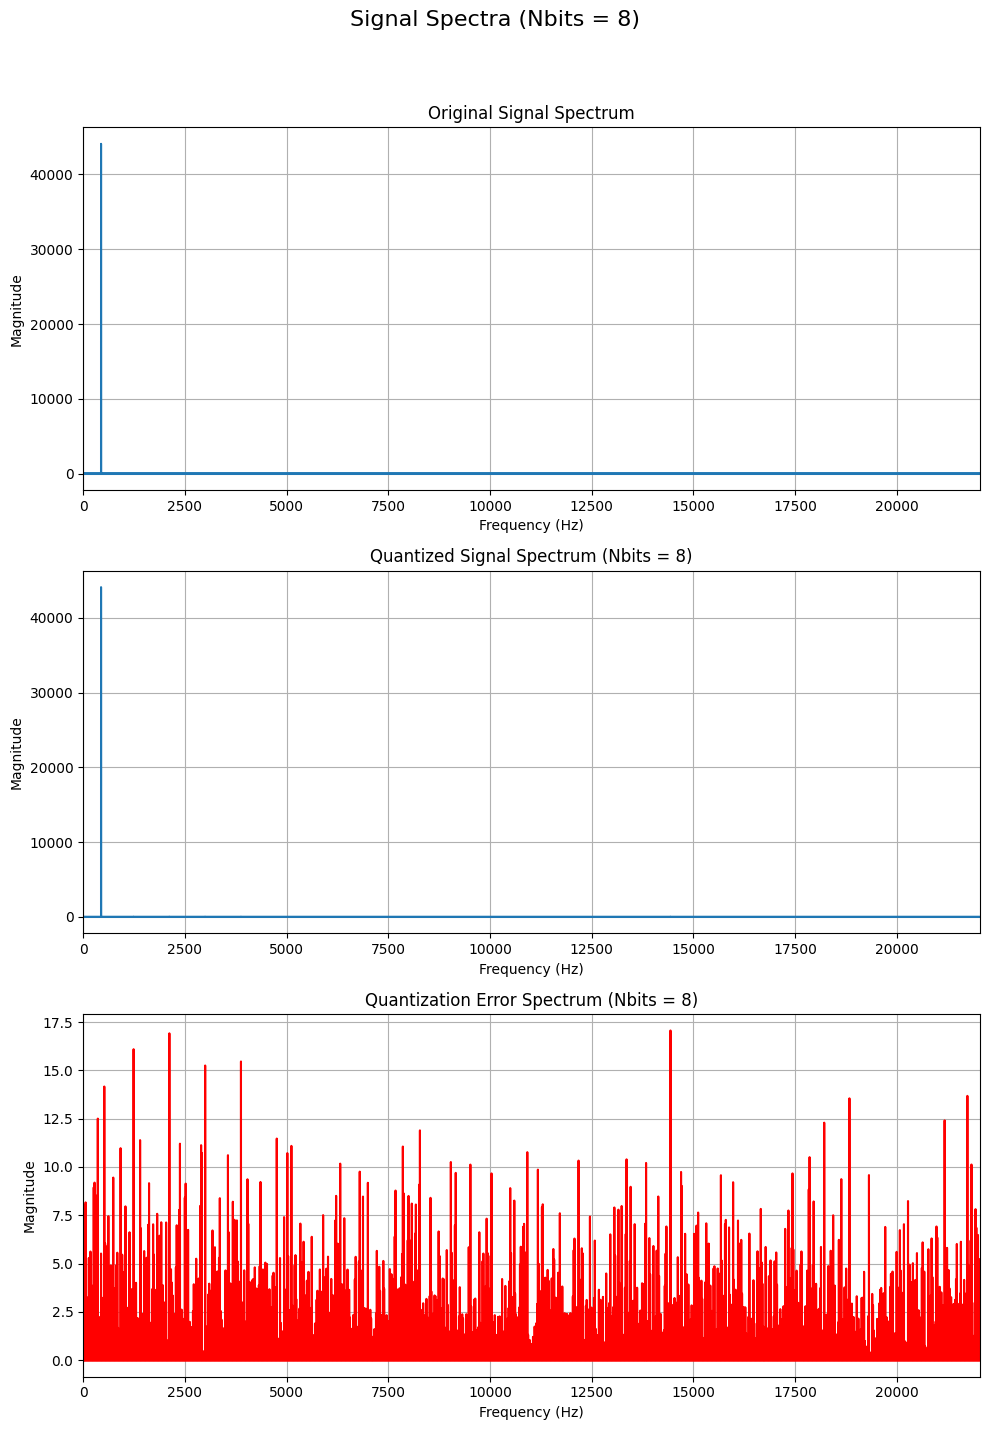

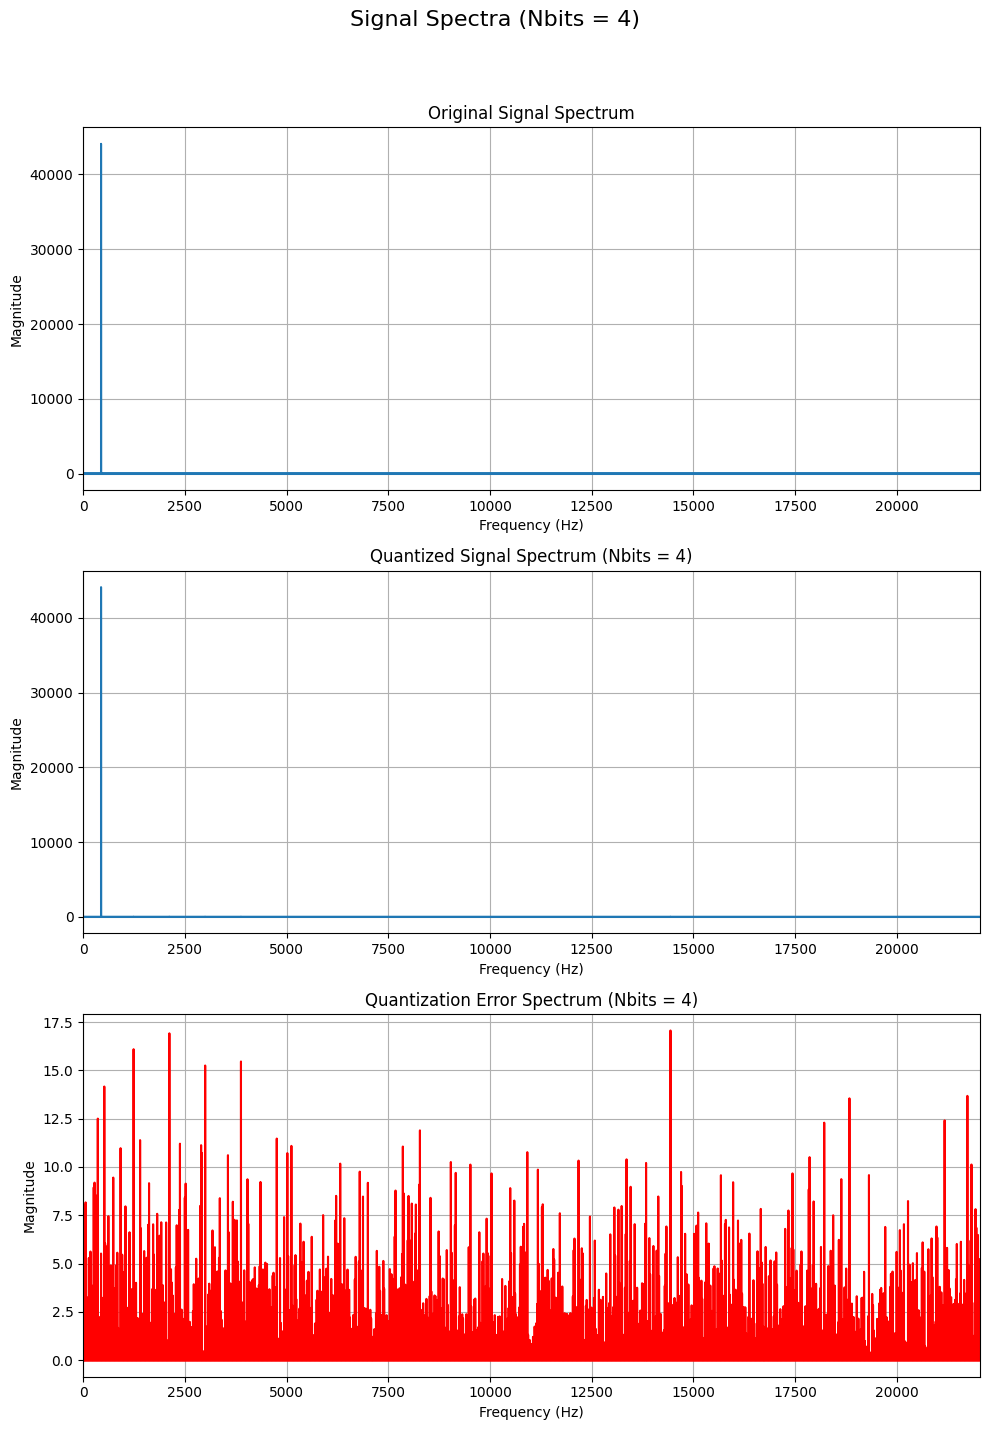

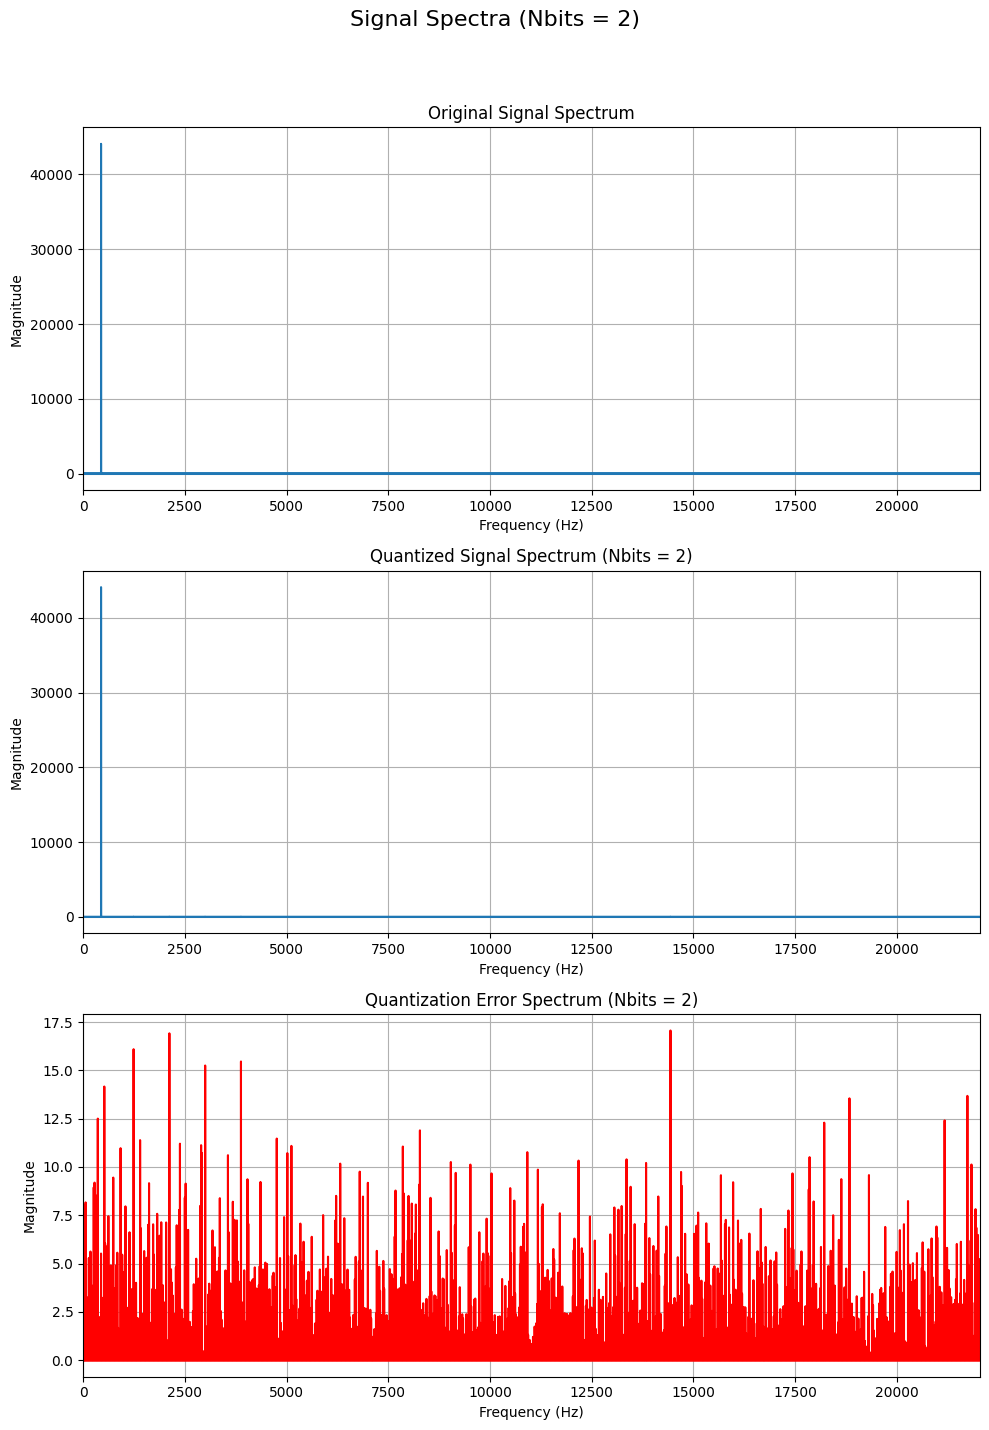

In [ ]:
import scipy.fft

# Calculate and visualize the spectrum for each nbits
for nbits in quantized_signals.keys():
    quantized_signal = quantized_signals[nbits]
    quantization_error = signal - quantized_signal

    # Compute FFT
    signal_fft = scipy.fft.fft(signal)
    quantized_signal_fft = scipy.fft.fft(quantized_signal)
    quantization_error_fft = scipy.fft.fft(quantization_error)

    # Calculate magnitude spectrum
    signal_magnitude = np.abs(signal_fft)
    quantized_signal_magnitude = np.abs(quantized_signal_fft)
    quantization_error_magnitude = np.abs(quantization_error_fft)

    # Generate frequency vector
    n = len(signal)
    frequencies = scipy.fft.fftfreq(n, 1/sampling_rate)

    # Plot spectra
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    fig.suptitle(f'Signal Spectra (Nbits = {nbits})', fontsize=16)

    # Original Signal Spectrum
    axes[0].plot(frequencies, signal_magnitude)
    axes[0].set_title('Original Signal Spectrum')
    axes[0].set_xlabel('Frequency (Hz)')
    axes[0].set_ylabel('Magnitude')
    axes[0].set_xlim(0, sampling_rate / 2) # Limit to Nyquist frequency
    axes[0].grid(True)

    # Quantized Signal Spectrum
    axes[1].plot(frequencies, quantized_signal_magnitude)
    axes[1].set_title(f'Quantized Signal Spectrum (Nbits = {nbits})')
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_ylabel('Magnitude')
    axes[1].set_xlim(0, sampling_rate / 2) # Limit to Nyquist frequency
    axes[1].grid(True)

    # Quantization Error Spectrum
    axes[2].plot(frequencies, quantization_error_magnitude, color='red')
    axes[2].set_title(f'Quantization Error Spectrum (Nbits = {nbits})')
    axes[2].set_xlabel('Frequency (Hz)')
    axes[2].set_ylabel('Magnitude')
    axes[2].set_xlim(0, sampling_rate / 2) # Limit to Nyquist frequency
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
    plt.show()